In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [170]:
# нужно если colab использует исключительно мощности компьютера
# на котором запускается проект

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


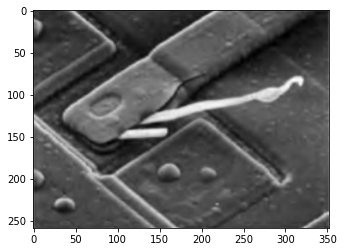

In [171]:
import glob
img = cv2.imread('/content/drive/MyDrive/University/Computer Vision/lab5/image.jpg', 0)
rows, cols = img.shape
plt.imshow(img, cmap='gray')

# Спектр


In [172]:
def distance(u,v,rows,cols):
  return math.sqrt((u-rows/2)**2 + (v-cols/2) ** 2)

In [173]:
def spectrum(img):
  fft = np.fft.fft2(img)
  fft_shift = np.fft.fftshift(fft)
  return fft_shift

In [174]:
def print_spectrum(img):
  magnitude_spectrum = np.abs(img) ** 0.1
  plt.imshow(magnitude_spectrum, cmap = 'gray')

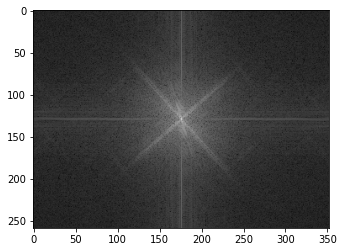

In [175]:
sp = spectrum(img)
print_spectrum(sp)

# Идеальный фильтр, Низкочастотный

In [176]:
def get_ILFF(D0):
  ILFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      if distance(x,y,rows,cols) <= D0:
        ILFF[x][y] = 1
  return ILFF

In [177]:
D = 20 # Размер окружности
n = 2 # Баттерворд, чем бли к 1, тем более похож на Гауса, чем ближе к ∞, тем ближе к идеально

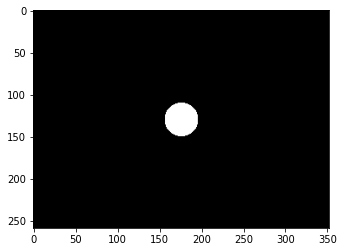

In [178]:
ILFF = get_ILFF(D)
print_spectrum(ILFF)

In [179]:
def change_spectrum(img,mask):
  fshift = img*mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  return fshift, img_back

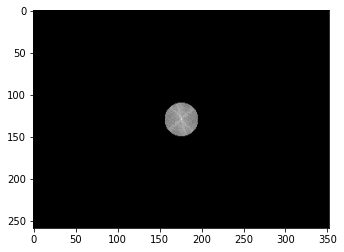

In [180]:
spc,img_back = change_spectrum(sp,ILFF)
print_spectrum(spc)

In [181]:
def print_img(img):
  filtered_img = np.abs(img)
  filtered_img -= filtered_img.min()
  filtered_img = filtered_img*255 / filtered_img.max()
  filtered_img = filtered_img.astype(np.uint8)
  plt.imshow(filtered_img, cmap = 'gray')
  return filtered_img

True

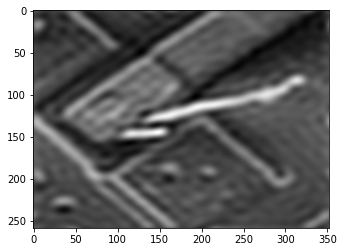

In [182]:
cv2.imwrite('Aravos_ILFF.jpg', print_img(img_back))

# Идеальный фильтр, Высокочастотный

In [183]:
def get_IHFF(D0):
  IHFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      if distance(x,y,rows,cols) > D0:
        IHFF[x][y] = 1
  return IHFF

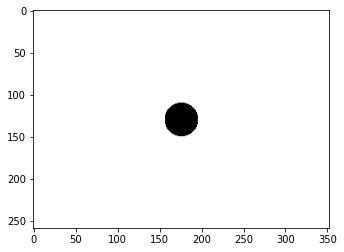

In [184]:
IHFF = get_IHFF(D)
print_spectrum(IHFF)

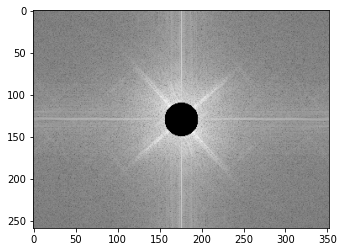

In [185]:
spc,img_back = change_spectrum(sp,IHFF)
print_spectrum(spc)

True

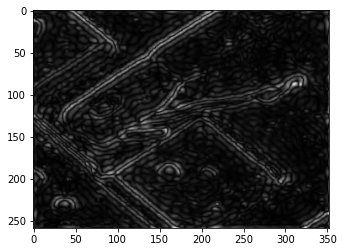

In [186]:
cv2.imwrite('Aravos_IHFF.jpg', print_img(img_back))

# Баттерворт, Низкочастотный

какой параметр отвечает что бы Баттерворт был ближе к идеальному и/или к Гаусу?

In [187]:
def get_BLFF(D0,n):
  BLFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      BLFF[x][y] = 1/(1+(distance(x,y,rows,cols)/D0)**(2*n))
  return BLFF

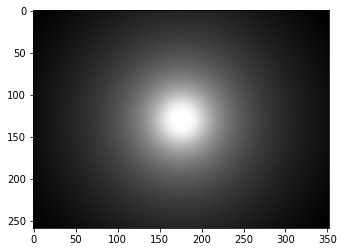

In [188]:
BLFF = get_BLFF(D,n)
print_spectrum(BLFF)

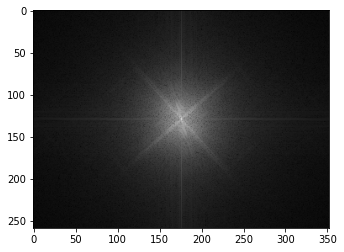

In [189]:
spc,img_back = change_spectrum(sp,BLFF)
print_spectrum(spc)

True

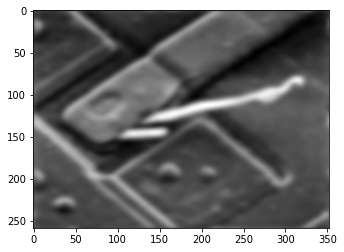

In [190]:
cv2.imwrite('Aravos_BLFF.jpg', print_img(img_back))

#Баттерворт, Высокочастотный

In [191]:
def get_BHFF(D0,n):
  BHFF = np.ones((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      BHFF[x][y] = 1 - 1/(1+(distance(x,y,rows,cols)/D0)**(2*n))
  return BHFF

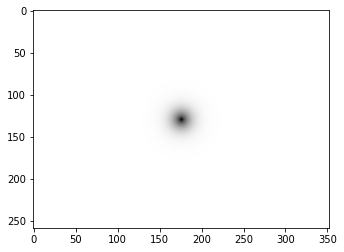

In [192]:
BHFF = get_BHFF(D,n)
print_spectrum(BHFF)

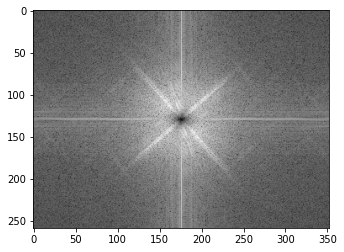

In [193]:
spc,img_back = change_spectrum(sp,BHFF)
print_spectrum(spc)

True

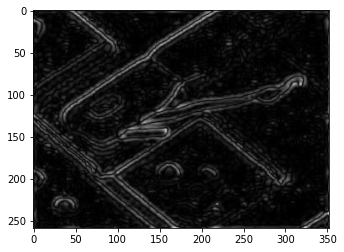

In [194]:
cv2.imwrite('Aravos_BHFF.jpg', print_img(img_back))

# Гауссовский, Низкочастотный

In [195]:
def get_GLFF(D0):
  GLFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      d = D0 ** 2
      d = d * 2
      GLFF[x][y] = math.exp((-1*distance(x,y,rows,cols)**2)/d)
  return GLFF

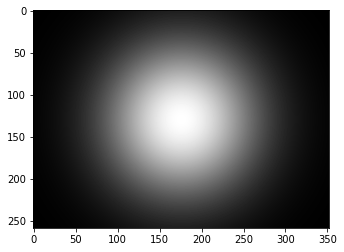

In [196]:
GLFF = get_GLFF(D)
print_spectrum(GLFF)

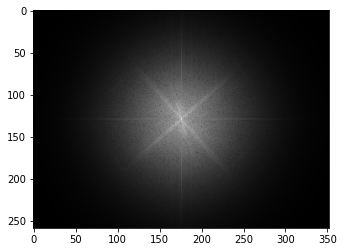

In [197]:
spc,img_back = change_spectrum(sp,GLFF)
print_spectrum(spc)

True

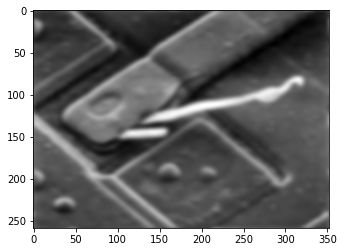

In [198]:
cv2.imwrite('Aravos_GLFF.jpg', print_img(img_back))

# Гауссовский, Высокочастотный

In [199]:
def get_GHFF(D0):
  GHFF = np.ones((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      d = D0 ** 2
      d = d * 2
      GHFF[x][y] = 1 - math.exp((-1*distance(x,y,rows,cols)**2)/d)
  return GHFF

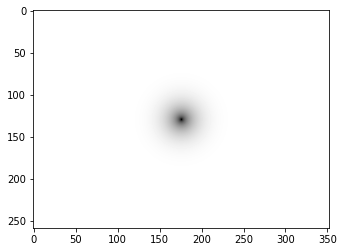

In [200]:
GHFF = get_GHFF(D)
print_spectrum(GHFF)

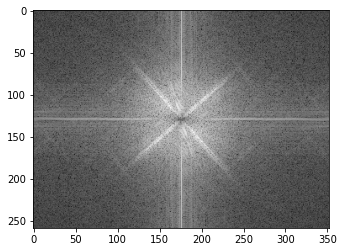

In [201]:
spc,img_back = change_spectrum(sp,GHFF)
print_spectrum(spc)

True

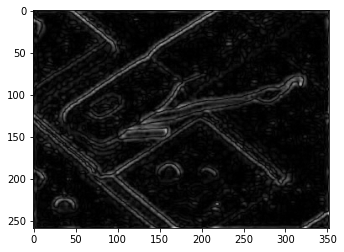

In [202]:
cv2.imwrite('Aravos_GHFF.jpg', print_img(img_back))